In [1]:
import pandas as pd
import datetime
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing needed libraries for this project.

In [2]:
def jez(x):
    if (x[-1]==0 and x[0]==1):
        return (True)
    else:
        return (False)

Defining function to check for change in values

In [3]:
def change(x):
    if x=='visitPage':
        z=int(1)
    else:
        z=int(0)
    return(z)

Defining function to check for change in values

In [4]:
dtset=pd.read_csv('events_log.csv')

Reading the data.

In [5]:
dtset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400165 entries, 0 to 400164
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   uuid             400165 non-null  object 
 1   timestamp        400165 non-null  float64
 2   session_id       400165 non-null  object 
 3   group            400165 non-null  object 
 4   action           400165 non-null  object 
 5   checkin          223824 non-null  float64
 6   page_id          400165 non-null  object 
 7   n_results        136234 non-null  float64
 8   result_position  230482 non-null  float64
dtypes: float64(4), object(5)
memory usage: 27.5+ MB


In [6]:
dtset.head()

,uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position
0,00000736167c507e8ec225bd9e71f9e5,2.016030e+13,78245c2c3fba013a,b,searchResultPage,NaN,cbeb66d1bc1f1bc2,5.0,NaN
1,00000c69fe345268935463abbfa5d5b3,2.016031e+13,c559c3be98dca8a4,a,searchResultPage,NaN,eb658e8722aad674,10.0,NaN
2,00003bfdab715ee59077a3670331b787,2.016030e+13,760bf89817ce4b08,a,checkin,30.0,f99a9fc1f7fdd21e,NaN,NaN
3,0000465cd7c35ad2bdeafec953e08c1a,2.016030e+13,fb905603d31b2071,a,checkin,60.0,e5626962a6939a75,NaN,10.0
4,000050cbb4ef5b42b16c4d2cf69e6358,2.016030e+13,c2bf5e5172a892dc,a,checkin,30.0,787dd6a4c371cbf9,NaN,NaN


In [7]:
dtset.describe()

,timestamp,checkin,n_results,result_position
count,4.001650e+05,223824.000000,136234.000000,230482.000000
mean,2.016030e+13,97.190382,13.210109,2.992798
std,2.340996e+06,104.593714,13.271104,38.557292
min,2.016030e+13,10.000000,0.000000,1.000000
25%,2.016030e+13,20.000000,2.000000,1.000000
50%,2.016030e+13,50.000000,20.000000,1.000000
75%,2.016031e+13,150.000000,20.000000,2.000000
max,2.016031e+13,420.000000,500.000000,4103.000000


In [8]:
dtset.isna().sum()

uuid                    0
timestamp               0
session_id              0
group                   0
action                  0
checkin            176341
page_id                 0
n_results          263931
result_position    169683
dtype: int64

The dataset seems to be clean with 3 features having Na values. Less us see the data given in problem statement and try to understand the dataset.


## Data

The dataset comes from a [tracking schema](https://meta.wikimedia.org/wiki/Schema:TestSearchSatisfaction2) that we use for assessing user satisfaction. Desktop users are randomly sampled to be anonymously tracked by this schema which uses a "I'm alive" pinging system that we can use to estimate how long our users stay on the pages they visit. The dataset contains just a little more than a week of EL data.

| Column          | Value   | Description                                                                       |
|:----------------|:--------|:----------------------------------------------------------------------------------|
| uuid            | string  | Universally unique identifier (UUID) for backend event handling.                  |
| timestamp       | integer | The date and time (UTC) of the event, formatted as YYYYMMDDhhmmss.                |
| session_id      | string  | A unique ID identifying individual sessions.                                      |
| group           | string  | A label ("a" or "b").                                     |
| action          | string  | Identifies in which the event was created. See below.                             |
| checkin         | integer | How many seconds the page has been open for.                                      |
| page_id         | string  | A unique identifier for correlating page visits and check-ins.                    |
| n_results       | integer | Number of hits returned to the user. Only shown for searchResultPage events.      |
| result_position | integer | The position of the visited page's link on the search engine results page (SERP). |

The following are possible values for an event's action field:

- **searchResultPage**: when a new search is performed and the user is shown a SERP.
- **visitPage**: when the user clicks a link in the results.
- **checkin**: when the user has remained on the page for a pre-specified amount of time.

### Example Session

|uuid                             |      timestamp|session_id       |group |action           | checkin|page_id          | n_results| result_position|
|:--------------------------------|:--------------|:----------------|:-----|:----------------|-------:|:----------------|---------:|---------------:|
|4f699f344515554a9371fe4ecb5b9ebc | 20160305195246|001e61b5477f5efc |b     |searchResultPage |      NA|1b341d0ab80eb77e |         7|              NA|
|759d1dc9966353c2a36846a61125f286 | 20160305195302|001e61b5477f5efc |b     |visitPage        |      NA|5a6a1f75124cbf03 |        NA|               1|
|77efd5a00a5053c4a713fbe5a48dbac4 | 20160305195312|001e61b5477f5efc |b     |checkin          |      10|5a6a1f75124cbf03 |        NA|               1|
|42420284ad895ec4bcb1f000b949dd5e | 20160305195322|001e61b5477f5efc |b     |checkin          |      20|5a6a1f75124cbf03 |        NA|               1|
|8ffd82c27a355a56882b5860993bd308 | 20160305195332|001e61b5477f5efc |b     |checkin          |      30|5a6a1f75124cbf03 |        NA|               1|
|2988d11968b25b29add3a851bec2fe02 | 20160305195342|001e61b5477f5efc |b     |checkin          |      40|5a6a1f75124cbf03 |        NA|               1|

This user's search query returned 7 results, they clicked on the first result, and stayed on the page between 40 and 50 seconds. (The next check-in would have happened at 50s.)

It appears SRP the action is set to searchResultPage and the no of result is shown. Checkin and result position are set to NA.
If the user clicks a page then the action is set to visitPage and the page visited is shown in result_position.
checkin action is the status scheck for how long a user stayed on a page. For visitpage and checkin the n_results stays NA. 


# What is our daily overall clickthrough rate?
We need to convert the timestamp that is integer to datetime and extract date to section the date into datewise groups. Sorting by timestamp to get a better understanding of data.

In [9]:
dtset=pd.read_csv('events_log.csv')
dtset['date'] = pd.to_datetime(dtset['timestamp'], format='%Y%m%d%H%M%S').dt.date
dtset['time'] = pd.to_datetime(dtset['timestamp'], format='%Y%m%d%H%M%S').dt.time

dtset=dtset.sort_values('timestamp')

In [10]:
dtset.head(5)

,uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position,date,time
336011,d6b87ce39b195ca0a5adecc48aaa6276,2.016030e+13,cbba9a98ba7b20cc,a,checkin,60.0,f79f531304a265f8,NaN,4.0,2016-03-01,00:00:01
88336,38ae77f3e7145186b2f8631c578e39db,2.016030e+13,cbba9a98ba7b20cc,a,searchResultPage,NaN,1376f8a941d1ce98,20.0,NaN,2016-03-01,00:00:02
236956,976a1ff3925a516aba858b8ad20cb9f9,2.016030e+13,c1f0f8499c6655cd,b,checkin,20.0,88bebe600b777ea9,NaN,NaN,2016-03-01,00:00:02
72364,2e71e942d17f5999a0e33d2b66b88520,2.016030e+13,614eaa17120fe46b,b,checkin,40.0,756d326815bc60c9,NaN,1.0,2016-03-01,00:00:02
80189,3373b4f03236565e8e36c35388831c8a,2.016030e+13,32edcb654a1dee57,b,checkin,150.0,d6122cfa99f1809f,NaN,1.0,2016-03-01,00:00:05


In [11]:
z=dtset[dtset['action']=='searchResultPage'].groupby(['date'],as_index='False').action.count()
y=dtset[dtset['action']=='visitPage'].groupby(['date'],as_index='False').action.count()
Ans1A=pd.concat([z,y],axis=1,keys=['No of SRP','No of Interest'])
t=dtset[dtset['action']!='checkin']
t1=t.apply(lambda x: change(x['action']), axis=1)
t['Status']=t1
t1=t.groupby(by=['date','session_id']).Status.rolling(2).apply(lambda x: jez(x), raw=True).fillna(0)
t2=t1.groupby(['date']).sum()
Ans1A['Real no of Interests']=t2.values
Ans1A['CThru rate']=Ans1A['Real no of Interests']/Ans1A['No of SRP']


z=dtset[dtset['action']=='searchResultPage'].groupby(by=['group']).action.count()
y=dtset[dtset['action']=='visitPage'].groupby(by=['group']).action.count()
Ans1B=pd.concat([z,y],axis=1,keys=['No of SRP','No of Interest'])

<ipython-input-11-d506786f3129>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['Status']=t1


Date wise clickthrough rates

In [12]:
Ans1A

,No of SRP,No of Interest,Real no of Interests,CThru rate
date,,,,
2016-03-01,18374,6654,1446.0,0.078698
2016-03-02,18902,6692,1502.0,0.079462
2016-03-03,19159,6574,1686.0,0.088000
2016-03-04,16675,4294,1468.0,0.088036
2016-03-05,13204,3323,1056.0,0.079976
2016-03-06,14612,3758,1174.0,0.080345
2016-03-07,19011,4714,1491.0,0.078428
2016-03-08,16297,4098,1331.0,0.081671


<AxesSubplot:xlabel='date', ylabel='CThru rate'>

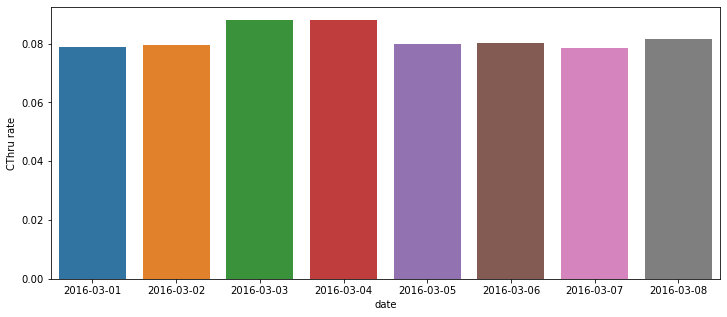

In [13]:
plt.figure(figsize=(12,5))
sns.barplot(data=Ans1A, x=Ans1A.index, y='CThru rate')

In [14]:
Ans1B

,No of SRP,No of Interest
group,,
a,92056,33265
b,44178,6842


In [15]:


z=dtset[dtset['action']=='searchResultPage'].groupby(by=['date']).action.count()
y=dtset[dtset['n_results']==0].groupby(by=['date']).action.count()
Ans3A=pd.concat([z,y],axis=1,keys=['No of SRP','No of zero results'])
Ans3A['Zero rate']=Ans3A['No of zero results']/Ans3A['No of SRP']


In [16]:
Ans3A

,No of SRP,No of zero results,Zero rate
date,,,
2016-03-01,18374,3447,0.187602
2016-03-02,18902,3589,0.189874
2016-03-03,19159,3443,0.179707
2016-03-04,16675,3015,0.180810
2016-03-05,13204,2442,0.184944
2016-03-06,14612,2574,0.176157
2016-03-07,19011,3460,0.182000
2016-03-08,16297,3157,0.193717


In [18]:

z=dtset[dtset['action']=='searchResultPage'].groupby(by=['group']).action.count()
y=dtset[dtset['n_results']==0].groupby(by=['group']).action.count()
Ans3B=pd.concat([z,y],axis=1,keys=['No of SRP','No of zero results'])
Ans3B['Zero rate']=Ans3B['No of zero results']/Ans3B['No of SRP']

Ans3B


,No of SRP,No of zero results,Zero rate
group,,,
a,92056,16902,0.183606
b,44178,8225,0.186179


In [19]:
dtset=dtset.sort_values(by=['session_id','timestamp'])
z=dtset[dtset['action']=='visitPage'].groupby(by=['date','session_id']).result_position.first()
z=pd.DataFrame(z)
z=pd.DataFrame(z.values,index=z.index.droplevel(1),columns=['result_position'])
Ans2A=z.groupby(by=['date']).result_position.agg(pd.Series.mode)

Ans2A


date
2016-03-01    1.0
2016-03-02    1.0
2016-03-03    1.0
2016-03-04    1.0
2016-03-05    1.0
2016-03-06    1.0
2016-03-07    1.0
2016-03-08    1.0
Name: result_position, dtype: float64

In [20]:
z=dtset[dtset['action']=='visitPage'].groupby(by=['group','session_id']).result_position.first()
z=pd.DataFrame(z)
z=pd.DataFrame(z.values,index=z.index.droplevel(1),columns=['result_position'])
Ans2B=z.groupby(by=['group']).result_position.agg(pd.Series.mode)

Ans2B

group
a    1.0
b    1.0
Name: result_position, dtype: float64

In [21]:

dtset=dtset.sort_values(by=['session_id','timestamp'])
z=dtset.groupby(by='session_id',as_index='False').timestamp.min()
y=dtset.groupby(by='session_id',as_index='False').timestamp.max()
z1=pd.concat([z,y],axis=1,keys=['starttime','stoptime'])
z1['starttime']=pd.to_datetime(z1['starttime'], format='%Y%m%d%H%M%S')
z1['stoptime']=pd.to_datetime(z1['stoptime'], format='%Y%m%d%H%M%S')
z1['timeelapsed']=(z1['stoptime']-z1['starttime'])/pd.Timedelta(minutes=1)
y=dtset[dtset['action']=='searchResultPage'].groupby(by='session_id',as_index='False').action.count()
z1=pd.concat([z1,y],axis=1)
z1['action']=z1['action'].fillna(0)
y=dtset[dtset['action']=='searchResultPage'].groupby(by='session_id',as_index='False').n_results.sum()
z1=pd.concat([z1,y],axis=1)
z1['n_results']=z1['n_results'].fillna(0)
y=dtset.groupby(by='session_id',as_index='False').group.first()
z1=pd.concat([z1,y],axis=1)
print(f"{z1['timeelapsed'].max()}")

8414.65
